# Laboratorio #5: Clasificador de Imagen Hiperespectral

# 2. Ingesta de datos

1. Incluir el siguiente código en la primera celda del notebook:

```import numpy as np

import h5py

f = h5py.File(’fruit3D.mat’,’r’)

g = h5py.File(’groundTruth.mat’,’r’)

HSI = f.get(’HSI’)

HSI = np.array(HSI)

GT = g.get(’groundTruth2D’)

GT = np.array(GT)
```

In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import time

In [8]:
f = h5py.File('fruit3D.mat','r')

g = h5py.File('groundTruth.mat','r')

HSI = f.get('HSI')

HSI = np.array(HSI)

GT = g.get('groundTruth2D')

GT = np.array(GT)

# 3. Procedimiento

1. Indica las dimensiones de ambos arreglos de numpy cargados, HSI y GT.

In [9]:
print (f'dimesiones del la imagen hiperespectral: {HSI.shape}'
       f'\n\ndimensiones del groundTruth2D: {GT.shape}')

dimesiones del la imagen hiperespectral: (120, 640, 640)

dimensiones del groundTruth2D: (640, 640)


vista de las imagenes cargadas


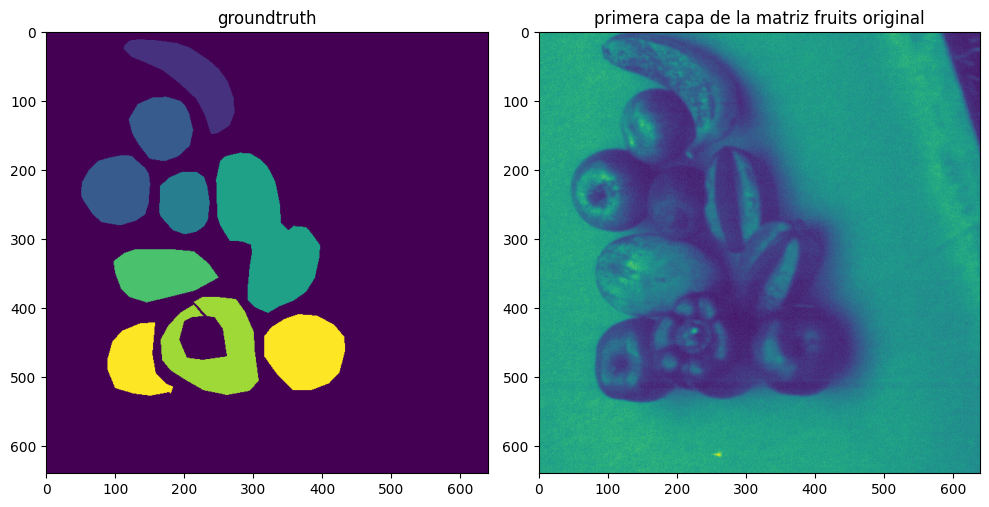

In [10]:
print("vista de las imagenes cargadas")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(GT)
plt.title('groundtruth')

plt.subplot(1, 2, 2)
plt.imshow(HSI[0,:,:])
plt.title('primera capa de la matriz fruits original')

plt.tight_layout()
plt.show()

2. Presenta una lista de los valores únicos en el arreglo GT

In [11]:
valores_unicos=np.unique(GT)
print(f'los valores unicos presentes son: {valores_unicos}')

los valores unicos presentes son: [0. 1. 2. 3. 4. 5. 6. 7.]


3. Para cada uno de los valores únicos (que llamaremos clases de ahora en adelante), indicar el número de ocurrencias de cada valor en el arreglo GT.

In [12]:
def conteo_valores(x):
    contador = sum(valor == x for fila in GT for valor in fila)
    return contador

for i in valores_unicos:
 print(f'\nla cantidad de veces que aparece la clase {int(i)} es: {conteo_valores(i)}')




la cantidad de veces que aparece la clase 0 es: 324417

la cantidad de veces que aparece la clase 1 es: 8784

la cantidad de veces que aparece la clase 2 es: 14508

la cantidad de veces que aparece la clase 3 es: 5384

la cantidad de veces que aparece la clase 4 es: 19825

la cantidad de veces que aparece la clase 5 es: 8598

la cantidad de veces que aparece la clase 6 es: 11696

la cantidad de veces que aparece la clase 7 es: 16388


4. En una nueva variable (o múltiples), crear una lista con las coordenadas de cada uno de los puntos para cada
clase en el arreglo GT. Indicar las dimensiones de esta lista para cada clase, y mostrar las primeras 5 líneas de
cada una.


In [13]:
coordenadas_por_clase = {}

for clase in valores_unicos[:]:
    coordenadas_por_clase[clase] = [(i, j) for i, fila in enumerate(GT) for j, valor in enumerate(fila) if valor == clase]

for clase, coordenadas in coordenadas_por_clase.items():
    dimensiones = len(coordenadas)
    print(f"Clase {clase}:")
    print(f"  Dimensiones: {dimensiones}")
    print(f"  Primeras 5 coordenadas: {coordenadas[:5]}")

Clase 0.0:
  Dimensiones: 324417
  Primeras 5 coordenadas: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
Clase 1.0:
  Dimensiones: 8784
  Primeras 5 coordenadas: [(12, 131), (12, 132), (12, 133), (12, 134), (12, 135)]
Clase 2.0:
  Dimensiones: 14508
  Primeras 5 coordenadas: [(95, 170), (95, 171), (95, 172), (95, 173), (95, 174)]
Clase 3.0:
  Dimensiones: 5384
  Primeras 5 coordenadas: [(204, 196), (204, 197), (204, 198), (204, 199), (204, 200)]
Clase 4.0:
  Dimensiones: 19825
  Primeras 5 coordenadas: [(176, 280), (176, 281), (176, 282), (176, 283), (177, 276)]
Clase 5.0:
  Dimensiones: 8598
  Primeras 5 coordenadas: [(316, 128), (316, 129), (316, 130), (316, 131), (316, 132)]
Clase 6.0:
  Dimensiones: 11696
  Primeras 5 coordenadas: [(385, 226), (385, 227), (385, 228), (385, 229), (385, 230)]
Clase 7.0:
  Dimensiones: 16388
  Primeras 5 coordenadas: [(410, 364), (410, 365), (410, 366), (410, 367), (410, 368)]


5. En una nueva variable (o múltiples), utilizar las listas de coordenadas del paso anterior para extraer y organizar
los espectros completos de cada una de las clases. Verificar que las dimensiones de estos arreglos para cada
clase sean de dimensiones 𝑁𝑐 × 120 para cada clase 𝑐.

In [14]:
coordenadas_por_clase_sin0 = {}

for clase in valores_unicos[1:]:
    coordenadas_por_clase_sin0[clase] = [(i, j) for i, fila in enumerate(GT) for j, valor in enumerate(fila) if valor == clase]

for clase, coordenadas in coordenadas_por_clase_sin0.items():
    dimensiones = len(coordenadas)
    print(f"Clase {clase}:")
    print(f"  Dimensiones: {dimensiones}")

Clase 1.0:
  Dimensiones: 8784
Clase 2.0:
  Dimensiones: 14508
Clase 3.0:
  Dimensiones: 5384
Clase 4.0:
  Dimensiones: 19825
Clase 5.0:
  Dimensiones: 8598
Clase 6.0:
  Dimensiones: 11696
Clase 7.0:
  Dimensiones: 16388


In [15]:
espectros_por_clase = {}

for clase, coordenadas in coordenadas_por_clase_sin0.items():
    espectros_clase = [HSI[:,i, j] for i, j in coordenadas]
    espectros_por_clase[clase] = espectros_clase

for clase, espectros in espectros_por_clase.items():
    dimensiones = (len(espectros), len(espectros[0]) if espectros else 0)
    print(f"Clase {clase}:")
    print(f"  Dimensiones: {dimensiones}")


Clase 1.0:
  Dimensiones: (8784, 120)
Clase 2.0:
  Dimensiones: (14508, 120)
Clase 3.0:
  Dimensiones: (5384, 120)
Clase 4.0:
  Dimensiones: (19825, 120)
Clase 5.0:
  Dimensiones: (8598, 120)
Clase 6.0:
  Dimensiones: (11696, 120)
Clase 7.0:
  Dimensiones: (16388, 120)


6. Por el método que le parezca más apropiado, dividir cada uno de los arreglos del paso anterior en arreglos de
entrenamiento y de prueba, obedeciendo una división de 20 % de las muestras para entrenamiento, y 80 % para
prueba. Mostrar las dimensiones de ambos arreglos (entrenamiento y prueba) para cada clase.


In [16]:
np.random.seed(0)
entrenamiento_por_clase = {}
prueba_por_clase = {}
coordenadas_entrenamiento_por_clase = {}
coordenadas_prueba_por_clase = {}

proporcion_entrenamiento = 0.2

for clase, coordenadas in coordenadas_por_clase_sin0.items():
    matriz_coordenadas = np.array(coordenadas)
    indices = np.arange(len(matriz_coordenadas))

    np.random.shuffle(indices)

    entrenamiento = int(proporcion_entrenamiento * len(matriz_coordenadas))

    indices_entrenamiento = indices[:entrenamiento]
    indices_prueba = indices[entrenamiento:]

    coordenadas_entrenamiento = matriz_coordenadas[indices_entrenamiento]
    coordenadas_prueba = matriz_coordenadas[indices_prueba]

    coordenadas_entrenamiento_por_clase[clase] = coordenadas_entrenamiento
    coordenadas_prueba_por_clase[clase] = coordenadas_prueba

    espectros_array = np.array([HSI[:, i, j] for i, j in coordenadas])
    entrenamiento_por_clase[clase] = espectros_array[indices_entrenamiento]
    prueba_por_clase[clase] = espectros_array[indices_prueba]

    print(f"Clase {clase}:")
    print(f"  Dimensiones entrenamiento: {entrenamiento_por_clase[clase].shape}")
    print(f"  Dimensiones prueba: {prueba_por_clase[clase].shape}")


Clase 1.0:
  Dimensiones entrenamiento: (1756, 120)
  Dimensiones prueba: (7028, 120)
Clase 2.0:
  Dimensiones entrenamiento: (2901, 120)
  Dimensiones prueba: (11607, 120)
Clase 3.0:
  Dimensiones entrenamiento: (1076, 120)
  Dimensiones prueba: (4308, 120)
Clase 4.0:
  Dimensiones entrenamiento: (3965, 120)
  Dimensiones prueba: (15860, 120)
Clase 5.0:
  Dimensiones entrenamiento: (1719, 120)
  Dimensiones prueba: (6879, 120)
Clase 6.0:
  Dimensiones entrenamiento: (2339, 120)
  Dimensiones prueba: (9357, 120)
Clase 7.0:
  Dimensiones entrenamiento: (3277, 120)
  Dimensiones prueba: (13111, 120)


7. A partir del arreglo de entrenamiento de cada clase, calcular el espectro promedio para cada una de las clases.

In [17]:
espectros_promedio = {}

for clase, espectros in entrenamiento_por_clase.items():
    espectros_promedio[clase] = np.mean(espectros, axis=0)
    print(f"se guardo el espectro promedio de la clase: {clase}")

se guardo el espectro promedio de la clase: 1.0
se guardo el espectro promedio de la clase: 2.0
se guardo el espectro promedio de la clase: 3.0
se guardo el espectro promedio de la clase: 4.0
se guardo el espectro promedio de la clase: 5.0
se guardo el espectro promedio de la clase: 6.0
se guardo el espectro promedio de la clase: 7.0


8. Escribir una función dist_euclideana(espectro1,espectro2) que realice el cálculo de la distancia
euclideana entre dos vectores, como plantea la Ecuación 1.

In [18]:
def dist_euclideana(espectro1, espectro2):
    return np.linalg.norm(espectro1 - espectro2)


9. Escribir una función dist_clases(espectro) que incorpore la función desarrollada en el paso anterior
para encontrar la distancia de un espectro cualquiera a los siete espectros promedio calculados en el Punto 7.
Verifique que la salida de la función sea un vector de siete valores numéricos que representen las distancias
euclideanas de un espectro desconocido a las siete clases conocidas.

In [19]:
def dist_clases(espectro):
    distancias = []
    for clase, espectro_prom in espectros_promedio.items():
        distancia = dist_euclideana(espectro, espectro_prom)
        distancias.append(distancia)
    return distancias

10. Escribir una función clasificar_pixel(espectro) que incorpore el resultado de la función desarrollada en el punto anterior para realizar la clasificación de un espectro cualquiera de acuerdo a la mínima distancia Euclideana. Verifique que la función produczca como salida únicamente la etiqueta numérica de clase
correspondiente a la clase a la que el espectro desconocido posee la menor distancia.

In [20]:
def clasificar_pixel(espectro):
    distancias = dist_clases(espectro)
    clase_minima = np.argmin(distancias) 
    return clase_minima  


## 4. Entregables
Compilar resultados en un reporte que incluya:


1. Imagen que muestre los pixeles de entrenamiento seleccionados para cada clase. Separar cada clase en un 20 %
de muestras para entrenamiento, y 80 % para prueba

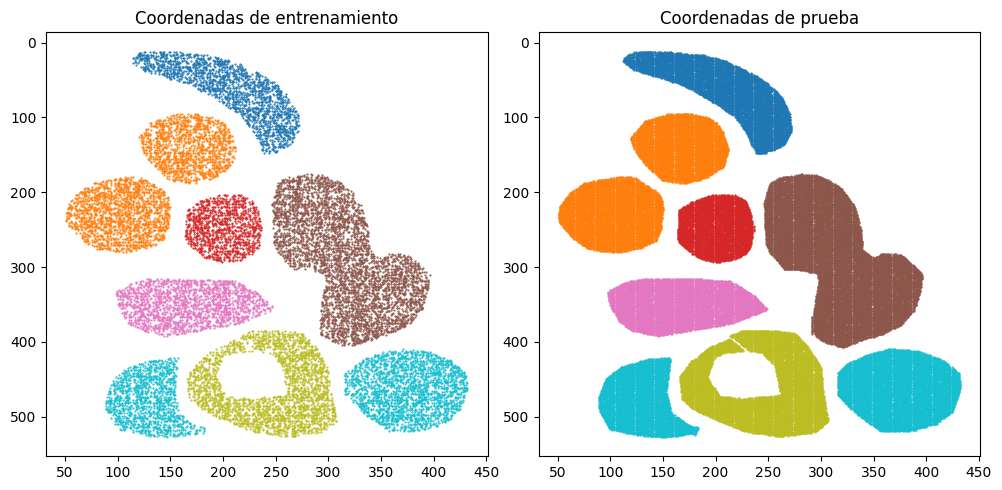

In [21]:
colores = plt.cm.tab10(np.linspace(0, 1, len(coordenadas_entrenamiento_por_clase)))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
for (clase, coordenadas), color in zip(coordenadas_entrenamiento_por_clase.items(), colores):
    plt.scatter(
        [coord[1] for coord in coordenadas], 
        [coord[0] for coord in coordenadas], 
        color=color, s=0.3
    )
plt.title('Coordenadas de entrenamiento')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
for (clase, coordenadas), color in zip(coordenadas_prueba_por_clase.items(), colores):
    plt.scatter(
        [coord[1] for coord in coordenadas], 
        [coord[0] for coord in coordenadas], 
        color=color, s=0.3
    )
plt.title('Coordenadas de prueba')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2. Gráfica que compare el comportamiento espectral de los pixeles representativos 𝑃𝑐
.

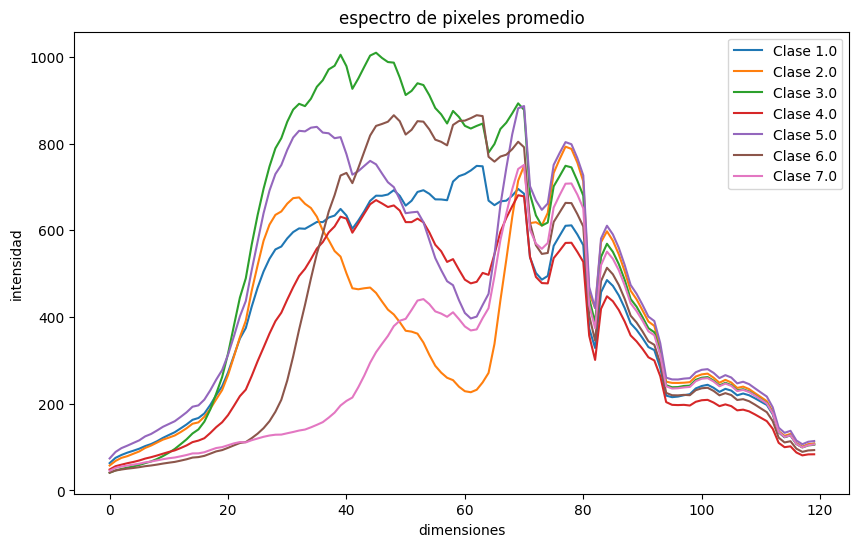

In [22]:
plt.figure(figsize=(10, 6))

for clase, espectro_promedio in espectros_promedio.items():
    plt.plot(espectro_promedio, label=f'Clase {clase}')

plt.title('espectro de pixeles promedio')
plt.xlabel('dimensiones')
plt.ylabel('intensidad')
plt.legend()
plt.show()


3. Imagen que muestre los resultados de la clasificación de todos los pixeles de la imagen proporcionada.

correspondientes a las etiquetas de clase llevan valores numéricos correspondientes a las clases de interés:

(1) Banana

(2) Green Apple

(3) Lemon

(4) Starfruit

(5) Mango

(6) Red Pepper

(7) Red Apple

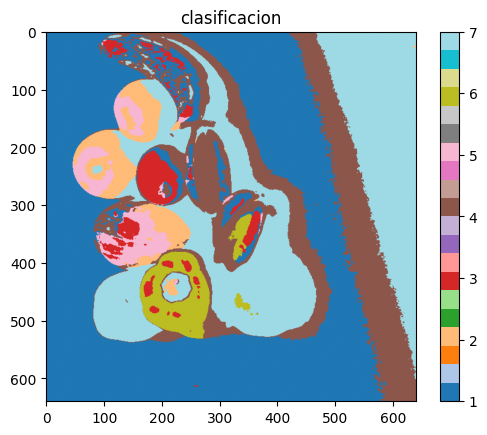

In [23]:
imagen_hsi_clasificada = np.empty_like(GT)
for i in range(GT.shape[0]):
    for j in range(GT.shape[1]):
        espectro = HSI[:,i, j]
        if np.any(espectro): 
            etiqueta = clasificar_pixel(espectro) + 1
            imagen_hsi_clasificada[i, j] = etiqueta

plt.imshow(imagen_hsi_clasificada, cmap='tab20')
plt.title('clasificacion')
plt.colorbar()
plt.show()


4. Imagen que muestre los resultados de la clasificacion de los pixeles de prueba (excluyendo los de entrenamiento,
y aquellos que no lleven una etiqueta de clase en el ground truth).

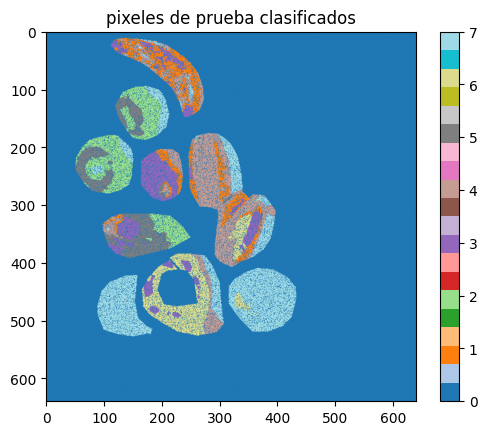

In [24]:
mascara_prueba = np.zeros_like(GT, dtype=bool)

for clase, coordenadas in coordenadas_prueba_por_clase.items():
    for (i, j) in coordenadas:
        mascara_prueba[i, j] = True

img_prueba_clasificada = imagen_hsi_clasificada * mascara_prueba
plt.imshow(img_prueba_clasificada,cmap='tab20')
plt.title('pixeles de prueba clasificados')
plt.colorbar()
plt.show()



5. Resultados de la clasificación de los pixeles de prueba en una matriz de confusión (confusion matrix)

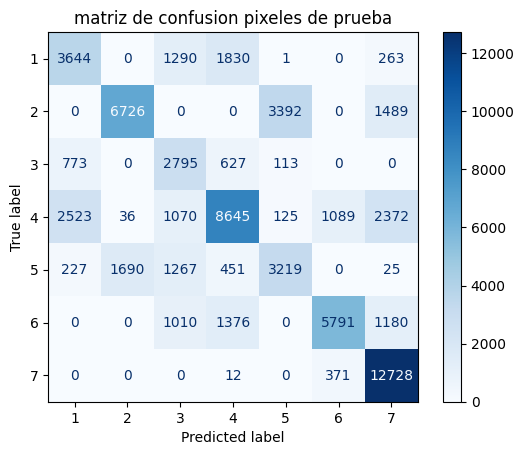

In [25]:
etiquetas_reales = []
etiquetas_predichas = []

for clase, coordenadas in coordenadas_prueba_por_clase.items():
    for (i, j) in coordenadas:
        etiquetas_reales.append(clase)
        etiquetas_predichas.append(img_prueba_clasificada[i, j])

matriz_confusion = confusion_matrix(etiquetas_reales, etiquetas_predichas, labels=np.arange(1, 8))  # Etiquetas de 1 a 7

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=np.arange(1, 8))
disp.plot(cmap='Blues')
plt.title("matriz de confusion pixeles de prueba")
plt.show()


6. Presente la precisión global (aciertos / pruebas) y la precisión por clase del modelo desarrollado.

In [26]:
precision = accuracy_score(etiquetas_reales, etiquetas_predichas)
print(f'precision: {precision:.2f}')

print('precision por clase:')
print(classification_report(etiquetas_reales, etiquetas_predichas))


precision: 0.64
precision por clase:
              precision    recall  f1-score   support

         1.0       0.51      0.52      0.51      7028
         2.0       0.80      0.58      0.67     11607
         3.0       0.38      0.65      0.48      4308
         4.0       0.67      0.55      0.60     15860
         5.0       0.47      0.47      0.47      6879
         6.0       0.80      0.62      0.70      9357
         7.0       0.70      0.97      0.82     13111

    accuracy                           0.64     68150
   macro avg       0.62      0.62      0.61     68150
weighted avg       0.66      0.64      0.64     68150



7. Distribución del tiempo de ejecución del código de clasificación para toda la imagen, e indicaciones de posibles
mejoras, de ser posibles, al tiempo de ejecución.

In [27]:
inicio = time.time()

for i in range(GT.shape[0]):
    for j in range(GT.shape[1]):
        espectro = HSI[:,i, j]
        if np.any(espectro):
            clasificar_pixel(espectro)

fin = time.time()
tiempo_total = fin - inicio
print(f'tiempo de ejecucion: {tiempo_total:.2f} en segundos')


tiempo de ejecucion: 34.05 en segundos


### posibles mejoras

Quiza valga la pena manipular los datos de la imagen con la ayuda de librerias como pandas que esta optimizada para el procesmiento de datos y viendo si es posible reducir aun mas el uso de bucles for 